# <center>ADM: Homework 2: Instagram Profiles & Posts</center>

* <b>Name: </b>Giulia Iadisernia         <b>Matricola</b>: 2065450 <b>Email: </b>iadisernia.2065450@studenti.uniroma.it  <br>
* <b>Name: </b>Lorenzo Incoronato       <b>Matricola</b>: 1916863 <b>Email: </b>incoronato.1916863@studenti.uniroma1.it <br>
* <b>Name: </b>Javier Martinez Velasco   <b>Matricola</b>: 2058968 <b>Email: </b>martinezvelasco.2058968@studenti.uniroma1.it<br>

### <b>[RQ1]</b> After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import os

In [2]:
#UPLOADING POSTS.CSV
fields = ["post_type", "numbr_likes","number_comments", "cts"]
df_instagram_posts_RQ1= pd.read_csv("~/instagram_posts.csv", sep = "\t" , usecols = fields ,parse_dates=["cts"] )
df_instagram_posts_RQ1_info = pd.read_csv("~/instagram_posts.csv", sep = "\t" ,nrows = 1 ,parse_dates=["cts"])
#DATA CLEANING 
df_instagram_posts_RQ1.numbr_likes.fillna(0, inplace = True)
df_instagram_posts_RQ1.number_comments.fillna(0, inplace = True)
#ASSIGNING VARIABLES
likes = df_instagram_posts_RQ1.numbr_likes
post_type = df_instagram_posts_RQ1.post_type
comments = df_instagram_posts_RQ1.number_comments
date = df_instagram_posts_RQ1.cts

<h3 style="font-size: 22px; color: #00009B"> RQ1.1 EDA on instagram_posts.csv</h3>

#### Dataset Variables
<b>SID</b>: Sequence ID <br>
<b>sid_profile</b>: Sequence ID of the profile from ## Profiles tab key <br>
<b>post_id</b>: Instagrams ID <br>
<b>profile_id</b>: Instagrams ID may be null <br>
<b>location_id</b>: Instagrams ID <br>
<b>cts</b>: Timestamp when the Post was created <br>
<b>post_type</b>: 1 - Photo, 2 - Video, 3 - multy <br>
<b>description</b>: May contain '\n' <br>
<b>numbr_likes</b>: Number of Likes at the moment it was visited <br>
<b>number_comments</b>: Number of comments at the moment it was visited <br>

#### Which variables will be considered for instagram_post.csv EDA?

The original dataset includes 10 variables, 6 of which don't provide any useful information by analyzing them numerically: "SID", "sid_profile", "post_id", "profile_id" and "location_id". Regarding "description", up to this point we don't have the required honwledge and tools to perform text mining and extract insights from this variable. Therefore, the exploratory data analysis will be performed over the remaining 4 variables: "post_type", "numbr_likes", "number_comments" and "cts". 

### Variables and data types

Here we can observe the different data types of the variables. Since the variables post_type, numbr_likes and number_comments are actually discrete, we could transform them into integer values in a later data cleaning stage. 

In [7]:
df_instagram_posts_RQ1_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sid              1 non-null      int64 
 1   sid_profile      1 non-null      int64 
 2   post_id          1 non-null      object
 3   profile_id       1 non-null      int64 
 4   location_id      1 non-null      int64 
 5   cts              1 non-null      datetime64[ns]
 6   post_type        1 non-null      int64 
 7   description      1 non-null      object
 8   numbr_likes      1 non-null      int64 
 9   number_comments  1 non-null      int64 
dtypes: int64(7), object(3)
memory usage: 208.0+ bytes


### Numerical Variables

##### <b>1. NUMBER OF LIKES</b>

<i>Summary Statistics</i><br>
"numbr_likes" is a numerical discrete variable that indicates the amount of likes a certain post has obtained. By looking (table below) at the main summary values from the distribution we observe a big range from 0 to near 8M likes. However, 75% of the values lay below 114 likes and the mode is 12 likes. This suggests that the current mean (283) might not the best measure of expection for this distribution (this value is probably too high). Therefore, for a better summary of the distribution, outliers should be identified.

In [23]:
print("mode          ", likes.mode()[0])
likes.describe().apply(lambda x: format(x, 'f'))

mode           12.0


count    42710197.000000
mean          283.502807
std          6124.608652
min             0.000000
25%            20.000000
50%            46.000000
75%           114.000000
max       8822952.000000
Name: numbr_likes, dtype: object

<i>Outliers</i><br>
In the output below, by obtaining the higher quantiles of the distribution we can clearly observe the <b>presence of outliers</b>. The quantile at percentile 0.95 shows that 95% of the total dataset posts(40,574.687) have received less than 471 likes.  
By using the Interquartile Rule to Find Outliers we find out that in the right tail of the distribution, around 10% of the population are outliers. **This is an extremely high number of outliers**, which we believe is related to the nature of the distribution (close to an exponential) and the big sample size, which shows a high variation of likes in the population.<br>

* IQR * 1.5 + Q3 = (114-20) * 1.5 + 114  = 255 <br>
* Percentile 90 = 256 <br>
* Therefore, 10% of the right tail of the distribution can be consider outliers

Percentile       Quantile
0.500000         46.000000
0.900000        256.000000
0.950000        471.000000
0.990000       2875.000000
0.999000      30636.000000
0.999900     181821.941200
0.999999    2028103.073639
1.000000    8822952.000000
Name: numbr_likes, dtype: object


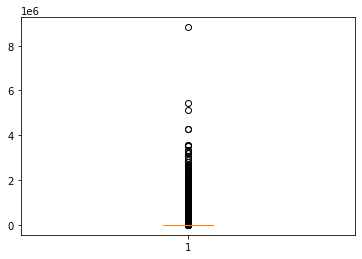

In [27]:
print("Percentile       Quantile")
print(likes.quantile([.5, .90, .95 , .99 , .999 , .9999 , .999999 , 1]).apply(lambda x: format(x, 'f')))
plt.boxplot(likes)
plt.show()

<i>Distribution of the Variable</i>
<br>
When ploting the distribution we observe its exponential nature, with a highly positive skew and leptokurtosis. In this barplot we "zoom" on the 95% left tail of the distribution, because it is more representative of the sample population.

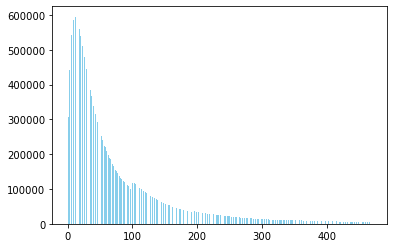

In [63]:
likes = df_instagram_posts_RQ1.numbr_likes
new_axis = likes[likes < 471]
unique,counts = np.unique(df_instagram_posts_RQ1.numbr_likes.values, return_counts=True)
try:
    plt.hist(new_axis,  bins='auto', normed=True , color = "skyblue")
except AttributeError:
    pass

##### <b>2. NUMBER OF COMMENTS</b>

<i>Summary Statistics</i><br>
We procede similarly with the variable "number_comments", which is a numerical discrete variable that indicates the amount of comments a certain post has obtained. We observe a range from 0 to near 488953 comments. We notice that 75% of the values lay below 5 comments and the mode is 0 comments. This suggests that the mean (7.59) might not the best measure of expection for this distribution (this value is probably too high). For a better summary of the distribution we proceed on identifying the outliers.

In [12]:
print("mode          ", comments.mode()[0])
comments.describe().apply(lambda x: format(x, 'f'))

mode           0.0


count    42710197.000000
mean            7.595301
std           194.147559
min             0.000000
25%             0.000000
50%             2.000000
75%             5.000000
max        488953.000000
Name: number_comments, dtype: object

<i>Outliers</i>
<br>
As with the number of likes, in the output below we can clearly observe the <b>presence of outliers</b>. The quantile at percentile 0.99 shows that 99% of the total dataset posts(40,574.687) have received less than 77 comments. Applying the interquartile rule we find out that, as happens with the number of likes, around 10% of the data are outliers:
* IQR * 1.5 + Q3 = (5-0) * 1.5 + 5  = 12.5 <br>
* Percentile 90 = 13 <br>
* Therefore, around 10% of the right tail of the distribution can be consider outliers

Percentile       Quantile
0.500000         2.000000
0.900000        13.000000
0.950000        23.000000
0.990000        77.000000
0.999000       462.000000
0.999900      2859.980400
0.999999     73893.938977
1.000000    488953.000000
Name: number_comments, dtype: object


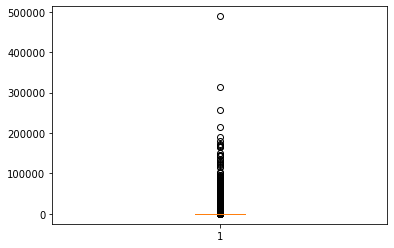

In [5]:
print("Percentile       Quantile")
print(comments.quantile([.5, .90, .95 , .99 , .999 , .9999 , .999999 , 1]).apply(lambda x: format(x, 'f')))
plt.boxplot(comments)
plt.show()

<i>Distribution of the Variable</i>
<br>
When ploting the distribution we observe it is very similar to the variable <i>number of likes</i> in terms of shape and skewness. 

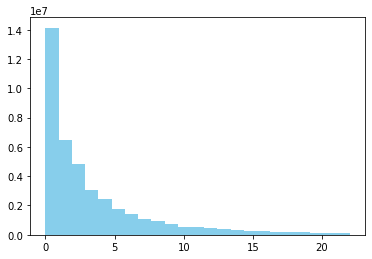

In [31]:
zoom_distro = comments[comments < 23]
unique,counts = np.unique(df_instagram_posts_RQ1.number_comments, return_counts=True)
try:
    plt.hist(zoom_distro,  bins=23 ,normed=True, color = "skyblue")
except AttributeError:
    pass

### Categorical Variables

<b>POST TYPES</b> <br>
<i>Summary Statistics</i><br>This is a categorical variable which indicates the kind of post a user has published (1: photo, 2: video, 3: mixed). The mean is very close to 1, which means that photos are the most common type of post. In fact, at least 75% of the users choosed pictures as post type.

In [21]:
post_type.describe().apply(lambda x: format(x, 'f'))

count    42710197.000000
mean            1.028486
std             0.172023
min             1.000000
25%             1.000000
50%             1.000000
75%             1.000000
max             3.000000
Name: post_type, dtype: object

<i>Distribution of the Variable</i><br>
When plotting the distribution of the variable, we can observe that near to 40 million posts are photos, and videos and mixed content (together) represent about 3% of the total posts.

Photos represent 0.972 % of the dataset.
Videos represent 0.027 % of the dataset.
Mixed content represent 0.001 % of the dataset.


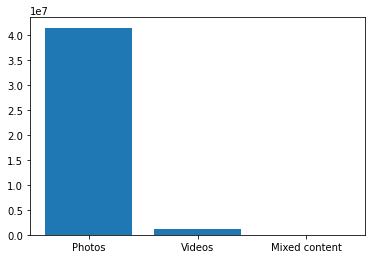

In [22]:
post,count = np.unique(post_type.values, return_counts=True)
postype = ["Photos","Videos","Mixed content"]
plt.bar(postype,count)
perc = count/42710197
[print(postype[i], "represent" , round(perc[i],3), "% of the dataset.") for i in range(len(perc))][0]

### Dates

##### <b>CTS</b>

<i>Summary Statistics</i><br>
'cts' is a variable that indicates the date and time a certain post was posted on Instagram. By looking at the table below we can see that the first post in our dataset was uploaded on 2010-07-19 at 01:12:23 while the last one was posted the day 2019-08-30 at 11:36:08.
We also observe that the time when most posts were posted in the same second has been the day 2019-05-29 at 23:41:46, when 29 posts were posted in the same moment.

In [32]:
date.describe()

count                42706865
unique               24181497
top       2019-05-29 23:41:46
freq                       29
first     2010-07-19 01:12:23
last      2019-08-30 11:36:08
Name: cts, dtype: object

In the following table we observe that, starting from 2010 with a minimum of 98 posts, every following year the number of post uploaded on instagram increased, reaching a maximum of 30215310 posts uploaded in 2019.

In [52]:
date.dt.year.value_counts()

2019.0    30215310
2018.0     8403250
2017.0     2505120
2016.0      986633
2015.0      383953
2014.0      142552
2013.0       51962
2012.0       16810
2011.0        1177
2010.0          98
Name: cts, dtype: int64

<i>Distribution of the Variable</i>
<br>
We plot below the distribution of the posts' years, and we notice its exponential growth, most likely due to the highly increasing relevance that this social network has been acquiring during the last years. Although maybe the reason is just that the data collection method was more focused on 2019 posts.

<BarContainer object of 10 artists>

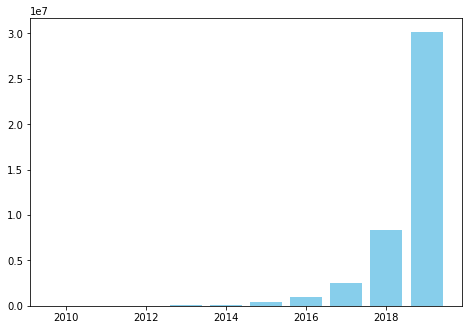

In [73]:
posts=list(date.dt.year.value_counts())
years=[int(i) for i in range(2019,2009,-1)]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.bar(years,posts,color='skyblue')

### Correlation

When plotting the numerical and categorical variables in a correlation matrix we don't observe any clear relation between the variables.

In [28]:
df_instagram_posts_RQ1.corr()

,post_type,numbr_likes,number_comments
post_type,1.000000,0.002544,0.002800
numbr_likes,0.002544,1.000000,0.374453
number_comments,0.002800,0.374453,1.000000


<h3 style="font-size: 22px; color: #00009B"> RQ1.2 EDA on instagram_profiles.csv</h3>

In [32]:
#Import the dataset df_instagram_profiles.csv
df_instagram_profiles_RQ1 = pd.read_csv("~/instagram_profiles.csv", delimiter = "\t")

#### Dataset `df_instagram_profiles` description

  * `sid`: sequence id `(float)`
  * `profile_id`: instagram orofile id `(float)`
  * `profile_name`: instagram profile name `(string)`
  * `firstname_lastname`: user's firstname and lastname `(string)`
  * `description`: user's instagram profile description `(string)`
  * `following`: number of following at the moment it was visited `(float)`
  * `followers`: number of followers at the moment it was visited `(float)`
  * `n_posts`: number of posts at the moment it was visited `(float)`
  * `url`: url `(string)`
  * `cts`: Timestamp when the profile was visited `(object)`
  * `is_business_account`: Boolean variable that indicates whether that profile was makred by the owner as business account or not `{False, True}`

### Numerical variables

In [17]:
df_instagram_profiles_RQ1['sid'] = df_instagram_profiles_RQ1['sid'].astype(str)
df_instagram_profiles_RQ1['profile_id'] = df_instagram_profiles_RQ1['profile_id'].astype(str)
df_instagram_profiles_RQ1 = df_instagram_profiles_RQ1.astype({'following': 'int', 'followers': 'int', 'n_posts': 'int'}, errors = 'ignore')
df_instagram_profiles_RQ1.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,following,followers,n_posts
count,3452771,3452771,3452771
mean,1406,4740,410
std,8113,193909,1042
min,0,0,0
25%,356,159,22
50%,754,406,120
75%,1573,974,420
max,4191080,285457645,183730


In order to visualize the distribution of the variables, we have defined the function `Hist(df_var, xlabel, title, col, n_bins, log_trans = False)` which returns an histogram of that specific variable `df_var`.<br>
Note: We apply the **log-transformation** when the data is strongly skewed.

In [4]:
def hist(df_var, xlabel, title, col, n_bins, log_trans = False):
    df_var.plot(kind = 'hist', color = col, bins = n_bins, logy = log_trans, ec = 'black')
    plt.xlabel(xlabel, labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title(title, y = 1.05)

<b>1. FOLLOWERS</b> <br>
<i>Distribution of the variable</i>

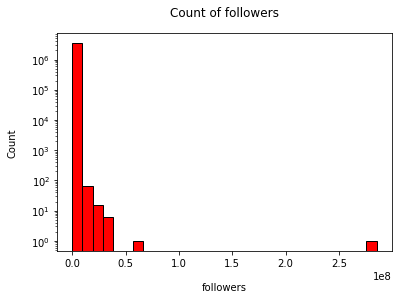

In [14]:
hist(df_instagram_profiles_RQ1['followers'], "followers", "Count of followers", col = "red", n_bins = 30, log_trans = True)

In the histogram below we can observe the distribution of the variable when it takes values less than ten thousand (`Followers < 10,000`) which is the interval where lays most of the mass of the distribution.

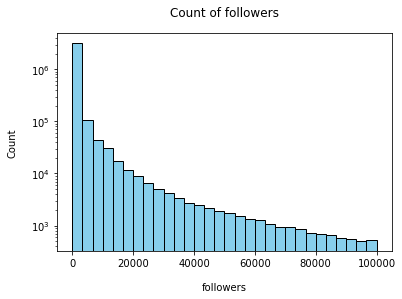

In [15]:
hist(df_instagram_profiles_RQ1.followers[df_instagram_profiles['followers'] < 100000], "followers", "Count of followers", col = "skyblue", n_bins = 30, log_trans = True)

<b>2. FOLLOWING</b> <br>

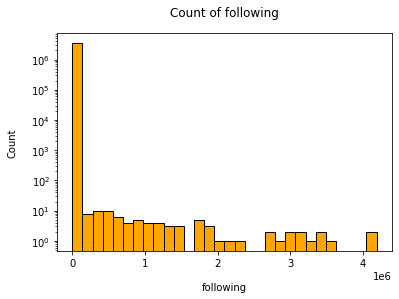

In [47]:
hist(df_instagram_profiles_RQ1['following'], "following", "Count of following", col = "orange", n_bins = 30, log_trans = True)

<b>3. NUMBER OF POSTS</b> <br>

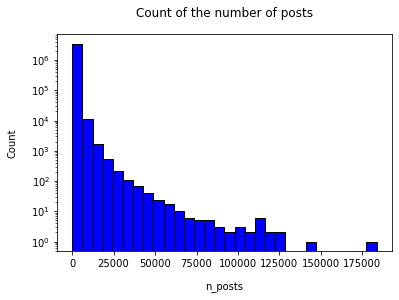

In [48]:
hist(df_instagram_profiles_RQ1['n_posts'], "n_posts", "Count of the number of posts", col = "blue", n_bins = 30, log_trans = True)

### Categorical variables

By observing the "top" row in the summary below, we learn that the most common name in the dataset is Sarah, or that the most used term in the descriptions is the emoji "🖤".

In [25]:
df_instagram_profiles_RQ1.describe(include = 'all')

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
count,4.509586e+06,4.477139e+06,4509586,4221121,2453590,3.452771e+06,3.452771e+06,3.452771e+06,870274,4071098,3445323
unique,NaN,NaN,4508180,3526944,2376474,NaN,NaN,NaN,841652,4062921,2
top,NaN,NaN,chkanyc,Sarah,🖤,NaN,NaN,NaN,gmail.com,2019-07-01 02:26:35.268 -0400,False
freq,NaN,NaN,4,2340,868,NaN,NaN,NaN,3437,6,2590069
mean,2.255992e+06,3.083302e+09,NaN,NaN,NaN,1.405641e+03,4.739899e+03,4.095414e+02,NaN,NaN,NaN
std,1.301807e+06,4.266575e+10,NaN,NaN,NaN,8.113473e+03,1.939087e+05,1.041940e+03,NaN,NaN,NaN
min,1.186000e+03,4.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,1.128596e+06,2.735177e+08,NaN,NaN,NaN,3.560000e+02,1.590000e+02,2.200000e+01,NaN,NaN,NaN
50%,2.255992e+06,1.649248e+09,NaN,NaN,NaN,7.540000e+02,4.060000e+02,1.200000e+02,NaN,NaN,NaN
75%,3.383389e+06,5.514691e+09,NaN,NaN,NaN,1.573000e+03,9.740000e+02,4.200000e+02,NaN,NaN,NaN


In order to plot categorical variables, let's define the function `bar_binary(df_var, xlabel, title, col)` that returns the bar chart of the binary variable `df_var`.

In [28]:
def bar_binary(df_var, xlabel, title, col):
    count = df_var.value_counts()
    count.plot(kind = 'bar', color = col, ec = 'purple')
    plt.xlabel(xlabel, labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title(title, y = 1.05)

##### **IS_BUSINESS_ACCOUNT**

The main categorical variable in the dataset is <i>is_business_account</i> which takes boolean values. As we observe in the graph below, close to 75% of the accounts are personal, while 25% are business accounts.

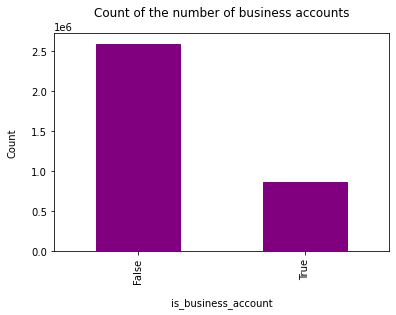

In [29]:
bar_binary(df_instagram_profiles_RQ1['is_business_account'], "is_business_account", "Count of the number of business accounts", "purple")

<h3 style="font-size: 22px; color: #00009B"> RQ1.3 EDA on locations.csv</h3>

In [30]:
# import the dataset df_instagram_locations
df_instagram_locations = pd.read_csv("~/instagram_locations.csv", delimiter = "\t")

#### Dataset `df_instagram_locations` description

* `sid`: sequence id `(string)`
* `id`: location id `(string)`
* `name`: location's name `(string)`
* `street`: street `(string)`
* `zip`: zip code `(string)`
* `city`: city name `(string)`
* `region`: region name `(string)`
* `cd`: country code `(string)`
* `phone`: phone in the same format as on Instagram `(string)`
* `aj_exact_city_match`: Instagram's internal key `{False, True}`
* `blurb`: description of the location `(string)`
* `dir_city_id`: Instagram's internal city id `(string)`
* `dir_city_slug`: city tag `(string)`
* `dir_country_id`: country id `(string)`
* `dir_country_name`: country name `(string)`
* `lat`: latitude `(float)`
* `lng`: longitute `(float)`
* `primary_alias_on_fb`: Boolean flag
* `website`: url to the website (it may contain more than one url)
* `cts`: timestamp when the location was visited `(pd object)`

### Numerical variables

In [31]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_instagram_locations['sid'] = df_instagram_locations['sid'].astype(str)
df_instagram_locations['id'] = df_instagram_locations['id'].astype(str)
df_instagram_locations.describe()

,lat,lng
count,1016495.00000,1016495.00000
mean,-15.29215,34.21718
std,76.15085,22.01081
min,-179.98300,-90.00000
25%,-80.15575,29.97555
50%,-2.45000,40.67820
75%,30.71740,48.84722
max,179.99412,89.99870


##### **Latitude**

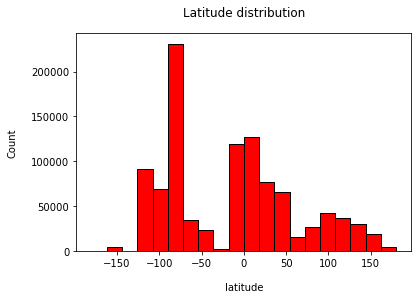

In [49]:
hist(df_instagram_locations['lat'], "latitude", "Latitude distribution", "red", n_bins = 20)

In [51]:
# most common latitude
df_instagram_locations['lat'].value_counts().idxmax()

37.6156

##### **Longitude**

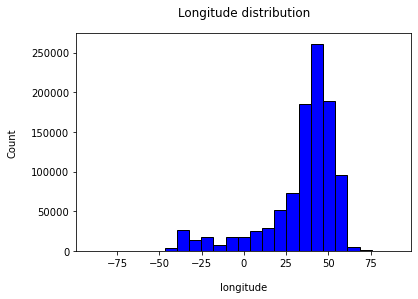

In [53]:
hist(df_instagram_locations['lng'], "longitude", "Longitude distribution", "blue", n_bins = 25)

In [16]:
# most common longitude
longitude.value_counts().idxmax()

55.7522

### Categorical variables

By looking at the main summary statistics of the categorical variables we learn that the average instragram user posts from the neighbourhood of <b>Hell's Kitchen, in New York (Eastern Province, US)</b>, most likely from a <b>Starbucks</b> .

In [55]:
df_instagram_locations.describe(include = 'all')

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
count,1022658,1022658,1022658,715704,715579,937166,1760,939010,601688,1000510,...,495698,495221,495628,495698,1016495.00000,1016495.00000,425531,941668,623262,1022658
unique,1022658,1022658,935776,656262,181474,118541,1743,245,577305,2,...,114996,114426,234,235,NaN,NaN,425486,833398,583671,1022298
top,719981,110296492939207,Starbucks,,10001,"New York, New York",Eastern Province,US,+44 345 748 4950,False,...,"Hells Kitchen, Manhattan",hells-kitchen-manhattan,US,United States,NaN,NaN,pandpnewcastle,-,http://www.starbucks.com/,2019-05-25 23:54:48.969
freq,1,1,1097,1652,1649,29954,4,331424,178,907651,...,1326,1326,170983,170983,NaN,NaN,2,6588,297,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-15.29215,34.21718,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76.15085,22.01081,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-179.98300,-90.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-80.15575,29.97555,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-2.45000,40.67820,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.71740,48.84722,NaN,NaN,NaN,NaN


##### **aj_exact_city_match**

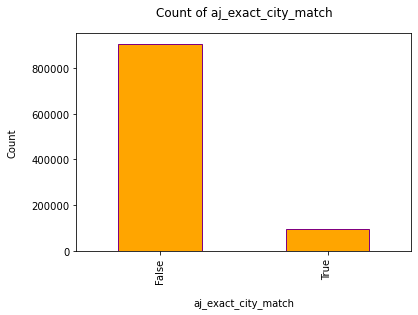

In [54]:
bar_binary(df_instagram_locations['aj_exact_city_match'], "aj_exact_city_match", "Count of aj_exact_city_match", "orange")

### <b>[RQ2]</b> Let's explore the dataset by finding simple insights regarding the profile and posts.

* **Missing values**
Before starting answering the questions, we perform some data cleaning tasks that will make our analysis less prompt to errors.

* Let's remove the columns that are not useful for our purposes:
  * `description` has 2055996 missing values
  * `url` has 3639312 missing values
* Replace `is_business_account missing` rows with `False` values
* Finally, let's remove the remaining rows with missing values

In [21]:
df_instagram_profiles.shape[0] # no. rows = 4,509,586
df_instagram_profiles.isna().sum() 

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

In [4]:
df_instagram_profiles_RQ2 = df_instagram_profiles.drop(['description', 'url'], axis = 1)
df_instagram_profiles_RQ2.is_business_account.fillna(False, inplace = True)
df_instagram_profiles_RQ2.dropna(axis = 0, how = 'any', inplace = True)
df_instagram_profiles_RQ2.shape[0] # no. rows = 3,130,712

Up to this point, we have removed 1,378.874 rows and 2 columns, obtaining as an output a more consistent dataset.

<b>2.1</b> Plot the number of posts for each profile in descending order

In [27]:
df_instagram_profiles_RQ2.sort_values(by = 'n_posts', ascending = False, inplace = True)
df_instagram_profiles_RQ2.n_posts = df_instagram_profiles_RQ2.n_posts.astype(int)
df_instagram_profiles_RQ2.n_posts

3990313    183730
2571453    142428
4338921    126340
3942129    125220
4219642    117262
            ...  
1786774         0
1711929         0
1446235         0
1446228         0
3719054         0
Name: n_posts, Length: 3130712, dtype: int64

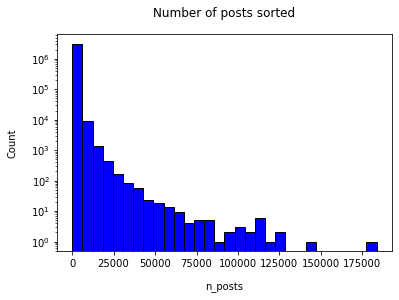

In [28]:
hist(df_instagram_profiles_RQ2['n_posts'], "n_posts", "Number of posts sorted", "blue", n_bins = 30, log_trans = True)

<b>2.2</b> What posts have the highest number of "likes"?

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise) and, as with profiles.csv, we perform some data cleaning: we remove NaN values and make likes and comments type int, instead of float.

In [31]:
fields = ["numbr_likes", "number_comments"]
df_instagram_posts_RQ2_1 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)
df_instagram_posts_RQ2_1.shape[0] # no. of rows = 42,710,197
df_instagram_posts_RQ2_1.isna().sum()

numbr_likes        36
number_comments    36
dtype: int64

In [33]:
# delete the NaN values
df_instagram_posts_RQ2_1.dropna(axis = 0, how = 'any', inplace = True)
# transform float to integer number
df_instagram_posts_RQ2_1 = df_instagram_posts_RQ2_1.astype({'numbr_likes': 'int', 'number_comments': 'int'}, errors = 'ignore')

* `most_likes` is obtained by sorting in **descending order** `df_instagram_posts_RQ2_1` according to the `numbr_likes` and then taking the first 10 posts (`.head(10)`) with the most likes.

In [35]:
most_likes = df_instagram_posts_RQ2_1.sort_values(by = 'numbr_likes', ascending = False).head(10)
most_likes

,numbr_likes,number_comments
19624085,8822952,165886
19623988,5447066,25303
19624082,5116398,40608
19623986,4271466,30770
39701024,4264745,18691
6293907,3586546,15405
19624086,3558599,15715
19802016,3533326,59475
30850564,3340297,149489
39812576,3311246,64318


<b>2.3</b> What posts have the most and the least number of comments?

* `most_comments` is obtained by sorting in **descending order** `df_instagram_posts_RQ2_1` according to the `number_comments` and then taking the first 10 posts (`.head(10)`) with the most comments.

In [36]:
most_comments = df_instagram_posts_RQ2_1.sort_values(by = 'number_comments', ascending = False).head(10)
most_comments 

,numbr_likes,number_comments
41873060,38871,488953
12164781,81523,313997
33261751,54507,257488
11149127,331703,214365
9383817,23515,189888
5427268,129258,180635
25257169,684861,173988
6220011,2224495,170836
31689573,226336,166919
14257307,169791,166198


* `least_comments` is obtained by sorting in **ascending order** `df_instagram_posts_RQ2_1` according to the `number_comments` and then taking the first 10 posts (`.head(10)`) with the least comments.

In [15]:
least_comments = df_instagram_posts_RQ2_1.sort_values(by = 'number_comments', ascending = True).head(10)
least_comments

,post_id,numbr_likes,number_comments
0,BXdjjUlgcgq,80,0
709,Bx-2z8Hhk1j,29,0
289,Bxr-ibHps7V,25,0
712,Bx5mknNBLCG,35,0
713,Bx3TT5TB3Tu,188,0
286,Bxztf_xlzLh,15,0
714,Bx0fZxkh-_4,134,0
284,Bx65tHPJH2S,18,0
283,ByA02DAl8SZ,19,0
282,ByCqFD-ASgn,9,0


<b>2.4</b> How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["post_id", "location_id"]
df_instagram_posts_RQ2_3 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [23]:
# includes tagged locations means location_name not Nan
count_tagged_location = df_instagram_posts_RQ2_3.loc[df_instagram_posts_RQ2_3['location_id'].notna()].shape[0] # 29,737,425
count_no_tagged_location = len(df_instagram_posts_RQ2_3) - count_tagged_location # 12,972,772

print("The number of posts     containing tagged locations is:", count_tagged_location)
print("The number of posts not containing tagged locations is:", count_no_tagged_location)

The number of posts     containing tagged locations is: 29737425
The number of posts not containing tagged locations is: 12972772


Text(0.5, 1.05, 'Count of tagged & no-tagged locations')

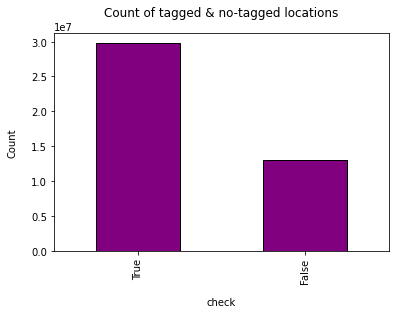

In [112]:
# plot
df_instagram_posts_RQ2_3['check'] = np.where(df_instagram_posts_RQ2_3['location_id'].notna(), True, False)
check = df_instagram_posts_RQ2_3['check']
count = check.value_counts()
count.plot(kind = 'bar', color = 'purple', ec = 'black')
plt.xlabel("check", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.title("Count of tagged & no-tagged locations", y = 1.05)

As it can be observed in the chart, almost 70% of the locations are tagged by users while 30% aren't. This could be interpreted, in the sense that, **most people post pictures on instagram when they are in a place where they want to be seen**, so it is more likely that the user wants its followers to know the location.

##### 2.5 How many posts include only photos? How many also have videos?

* We import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["post_id", "post_type"]
df_instagram_posts_RQ2_2 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [141]:
# l1: list containing only post_type == 1 (only photos)
l1 = [1]
print("The number of posts that include only photos is", df_instagram_posts_RQ2_2.loc[df_instagram_posts_RQ2_2['post_type'].isin(l1)].shape[0]) # 41,534,486

The number of posts that include only photos is 41534486


In [143]:
# l1: list containing only post_type == 3 (photos and video)
l2 = [3]
print("The number of posts that include both photos and videos is", df_instagram_posts_RQ2_2.loc[df_instagram_posts_RQ2_2['post_type'].isin(l2)].shape[0]) # 40,943

The number of posts that include both photos and videos is 40943


##### f) What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

* **Note**: the missing values of the `is_business_account` variable were substituted with `False`. So, the percentages may be different by just eliminating the missing values for that column.

In [138]:
# Percentage of business accounts & non-business accounts

count_business_accounts = df_instagram_profiles.loc[df_instagram_profiles['is_business_account'] == True].shape[0]
percentage_business_accounts = count_business_accounts/len(df_instagram_profiles)

a = "Percentage of business accounts: " + '{0:.2%}'.format(percentage_business_accounts)
b = "Percentage of non-business accounts: " + '{0:.2%}'.format(1 - percentage_business_accounts)

print(os.linesep.join([a, b])) # 18.97%

Percentage of business accounts: 18.97%
Percentage of non-business accounts: 81.03%


This significant difference between the number of business and non-business accounts could be interpreted from a social perspective: even though instagram is one of the most attractive markets for all kind of brands, at its core is mainly used by regular people that want to interact with their friends and make new ones.

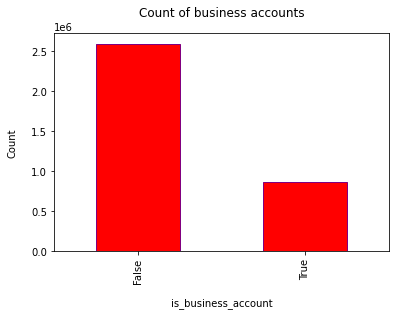

In [77]:
# plot of percentage of business & non-business accounts
bar_binary(df_instagram_profiles['is_business_account'], "is_business_account", "Count of business accounts", "red")

### <b>[RQ3]</b> Now it's important to understand the most common times in which users publish their posts

##### 3.1 What is the most common time in which users publish their posts?

* Let's import the `instagram_posts.csv` dataset (only the columns that we need for this excercise)

In [2]:
fields = ["profile_id", "cts"]
df_instagram_posts_RQ3 = pd.read_csv("~/instagram_posts.csv", delimiter = "\t", usecols = fields)

In [3]:
# For workability reasons, we need to divide dataset into chunks of 5,000,000 rows.
chunk_list = []
for i in range(0, len(df_instagram_posts_RQ3), 5000000):
    chunk = df_instagram_posts_RQ3[i:i+5000000]
    chunk_list.append(chunk)

* Then we convert the `cts` column from object type to `datetime`. Then we create two new columns:
  * `cts_time`: in the format `hh:mm:ss`. For instance, `20:00:00`
  * `hour`: in the format `hh`. For instance, `20`<br>
  Finally we append the chunks to a new list named `chunk_list_new`.

In [4]:
# Convert string (object type) to datetime
# Then, get only time from cts (we are not interested in the dates but only in the time)
chunk_list_new = []
for chunk in chunk_list:
    chunk_copy = chunk.copy()
    chunk_copy['cts_time'] = pd.to_datetime(chunk['cts']).dt.time
    chunk_copy['hour'] = pd.to_datetime(chunk['cts']).dt.hour
    chunk_list_new.append(chunk_copy)

* We group by `cts_time` and `hour` by chunks and obtain two new lists `chunk_list_new1` and `chunk_list_new2`.

In [40]:
# Group by cts_time

chunk_list_new1 = []
for chunk in chunk_list_new:
    chunk  = chunk.groupby('cts_time').size().reset_index(name='counts')
    chunk_list_new1.append(chunk)

In [42]:
# Group by hour

chunk_list_new2 = []
for chunk in chunk_list_new:
    chunk  = chunk.groupby('hour').size().reset_index(name='counts')
    chunk_list_new2.append(chunk)

* We concatenate the chunks and obtain two dataframes `data` and `data2`.
  * `data` contains `cts_time`.
  * `data2` contains `hour`.

In [43]:
# Concatenate chunks, group by cts_time (and hour) and add up counts

data  = pd.concat(chunk_list_new1).groupby(['cts_time']).sum().reset_index()
data2 = pd.concat(chunk_list_new2).groupby(['hour']).sum().reset_index()
data2.hour = data2.hour.astype(int)

##### The most common time(s) in which users publish their posts is 21:00:09. People post 47.5% more at this time that other times.

In [44]:
count = data.counts.value_counts(ascending = True).values[0]
data.sort_values(by = 'counts', ascending = False).head(count) # 21:00:09

,cts_time,counts
75609,21:00:09,928


In [21]:
print("The average number of times each cts_time is present in the dataset:", int(np.mean(data.counts)))
print("The median  number of times each cts_time is present in the dataset:", int(np.median(data.counts))) 
print("The maximum number of times each cts_time is present in the dataset:", int(np.max(data.counts)))
print("The minimum number of times each cts_time is present in the dataset:", int(np.min(data.counts)))

The average number of times each cts_time is present in the dataset: 487
The median  number of times each cts_time is present in the dataset: 494
The maximum number of times each cts_time is present in the dataset: 928
The minimum number of times each cts_time is present in the dataset: 223


##### The most common hour(s) in which users publish their posts

In [45]:
count2 = data2.counts.value_counts(ascending = True).values[0]
data2.sort_values(by = 'counts', ascending = False).head(count2) # 21:00:09

,hour,counts
19,19,2499758


In [25]:
print("The average number of times each hour is present in the dataset:", int(np.mean(data2.counts)))
print("The median  number of times each hour is present in the dataset:", int(np.median(data2.counts))) 
print("The maximum number of times each hour is present in the dataset:", int(np.max(data2.counts)))
print("The minimum number of times each hour is present in the dataset:", int(np.min(data2.counts)))
print("People post 29% more in the time slot (19:00-19:59) wrt the other time slots")

The average number of times each hour is present in the dataset: 1779452
The median  number of times each hour is present in the dataset: 1779408
The maximum number of times each hour is present in the dataset: 2499758
The minimum number of times each hour is present in the dataset: 1011923
People post 29% more in the time slot (19:00-19:59) wrt the other time slots


##### 3.2 Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [18]:
def time_intervals(data, time, time_intervals_list, title):
    
    time_results = {}
    for slot in time_intervals_list:
        result = len(data[(time >= slot[0]) &
                                  (time < slot[1])])
        time_results[str(slot)] = result
    
    plt.bar(list(time_results.keys()), time_results.values(), color = 'blue', ec = 'black', width = 0.8)
    plt.xlabel("time slots", labelpad = 14)
    plt.ylabel("Count", labelpad = 14)
    plt.title(title, y = 1.05)
    plt.show() 

##### 3.3 Use the function that you created in the previous literal to plot the number of posts between the following time intervals.

In [5]:
slots = [(6, 10), (11, 13), (14, 16), (17, 19), (20, 23), (0, 2), (3, 5)]

In [7]:
# concatenate the chunks

data2 = pd.concat(chunk_list_new)

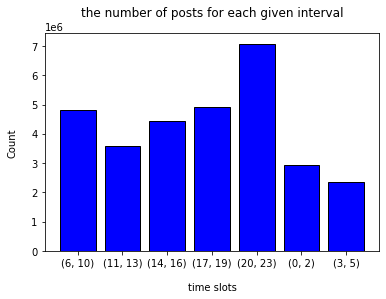

In [19]:
time_intervals(data2, data2.hour, slots, title = "the number of posts for each given interval")